# Data Exploration
This notebook explores the bike data and displays some plots, to find good ideas for expectations

In [1]:
import great_expectations as ge
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

metric column.standard_deviation.aggregate_fn is being registered with different metric_provider; overwriting metric_provider


In [2]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust width to avoid cutting off columns
pd.set_option('display.max_colwidth', None)  # Show full content in each column
pd.set_option('display.max_rows', None)  # Show all rows

In [3]:
# Load the dataset
df_spring_2011 = pd.read_csv("data/bike_rental_2011_Spring.csv")
df_summer_2011 = pd.read_csv("data/bike_rental_2011_Summer.csv")
df_fall_2011 = pd.read_csv("data/bike_rental_2011_Fall.csv")
df_winter_2011 = pd.read_csv("data/bike_rental_2011_Winter.csv")

df_spring_2012 = pd.read_csv("data/bike_rental_2012_Spring.csv")
df_summer_2012 = pd.read_csv("data/bike_rental_2012_Summer.csv")
df_fall_2012 = pd.read_csv("data/bike_rental_2012_Fall.csv")
df_winter_2012 = pd.read_csv("data/bike_rental_2012_Winter.csv")

df_year_2012 = pd.concat([df_spring_2012, df_summer_2012, df_fall_2012, df_winter_2012])

In [ ]:
def plot_rentals_vs_time(df, plotcol):
    """
    Plots total rentals against day and hour from a pandas DataFrame.

    Args:
        df (pd.DataFrame): DataFrame with 'dteday', 'hour', and plotcol columns.
    """

    # Ensure 'dteday' is a datetime object
    df['dteday'] = pd.to_datetime(df['dteday'])

    # Create a new datetime column combining date and hour
    df['datetime'] = df['dteday'] + pd.to_timedelta(df['hour'], unit='h')

    fig, ax1 = plt.subplots(figsize=(15, 6))

    color = 'tab:blue'

    ax1.set_xlabel('Date and Hour')
    ax1.set_ylabel('Total Rentals', color=color)
    ax1.plot(df['datetime'], df['total'], marker='.', linestyle='-', markersize=2, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()

    color = 'tab:red'
    ax2.set_ylabel(plotcol, color=color)  # we already handled the x-label with ax1
    ax2.plot(df['datetime'], df[plotcol], marker='.', linestyle='-', markersize=2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.suptitle('Total Rentals and Temperature vs. Day and Hour')
    fig.autofmt_xdate() #rotate the x axis labels

    # Format the x-axis to show dates and hours nicely
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7)) #Show one tick per week

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.grid(True)
    plt.show()

## First Set (Spring)

In [4]:
df_spring_2011.head()

,id,dteday,season,year,mnth,hour,holiday,weekday,workingday,weather,temp,felt_temp,humidity,windspeed,casual,registered,total
0,1808,2011-03-21,Spring,2011,3,0,0,Monday,1,Bad,7.98,3.998,66.0,26.0027,2,11,13
1,1809,2011-03-21,Spring,2011,3,1,0,Monday,1,Okay,7.98,3.998,71.0,26.0027,1,6,7
2,1810,2011-03-21,Spring,2011,3,2,0,Monday,1,Okay,7.98,3.998,71.0,22.0028,1,5,6
3,1811,2011-03-21,Spring,2011,3,3,0,Monday,1,Okay,7.98,3.998,71.0,22.0028,0,1,1
4,1812,2011-03-21,Spring,2011,3,5,0,Monday,1,Good,7.04,3.998,81.0,19.9995,1,1,2


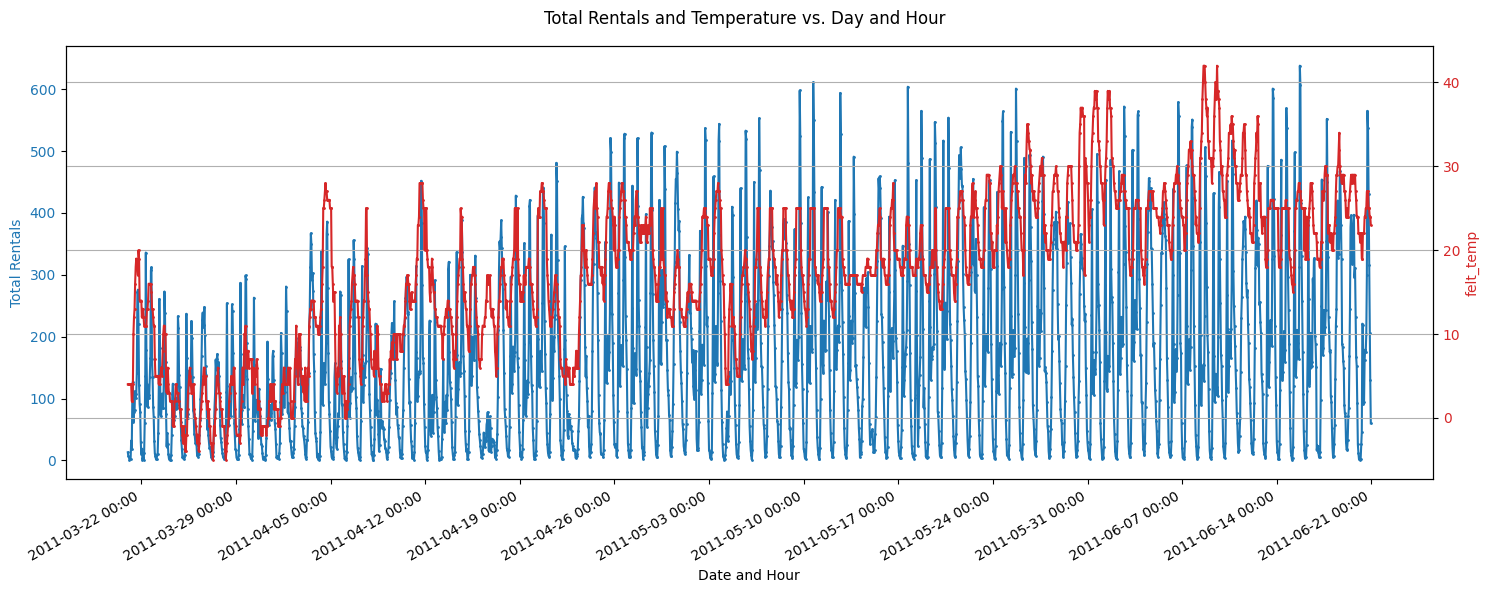

In [26]:
plot_rentals_vs_time(df_spring_2011, 'felt_temp')

## Second Set: Summer

In [24]:
df_summer_2011.head()

,id,dteday,season,year,mnth,hour,holiday,weekday,workingday,weather,temp,felt_temp,humidity,windspeed,casual,registered,total,datetime
0,4011,2011-06-21,Summer,2011,6,0,0,Tuesday,1,Good,21.14,22.9994,78.0,11.0014,10,23,33,2011-06-21 00:00:00
1,4012,2011-06-21,Summer,2011,6,1,0,Tuesday,1,Bad,21.14,22.9994,78.0,11.0014,2,12,14,2011-06-21 01:00:00
2,4013,2011-06-21,Summer,2011,6,2,0,Tuesday,1,Bad,21.14,22.0028,83.0,11.0014,1,5,6,2011-06-21 02:00:00
3,4014,2011-06-21,Summer,2011,6,3,0,Tuesday,1,Bad,21.14,22.0028,83.0,11.0014,0,2,2,2011-06-21 03:00:00
4,4015,2011-06-21,Summer,2011,6,4,0,Tuesday,1,Okay,20.20,20.0030,88.0,7.0015,2,7,9,2011-06-21 04:00:00


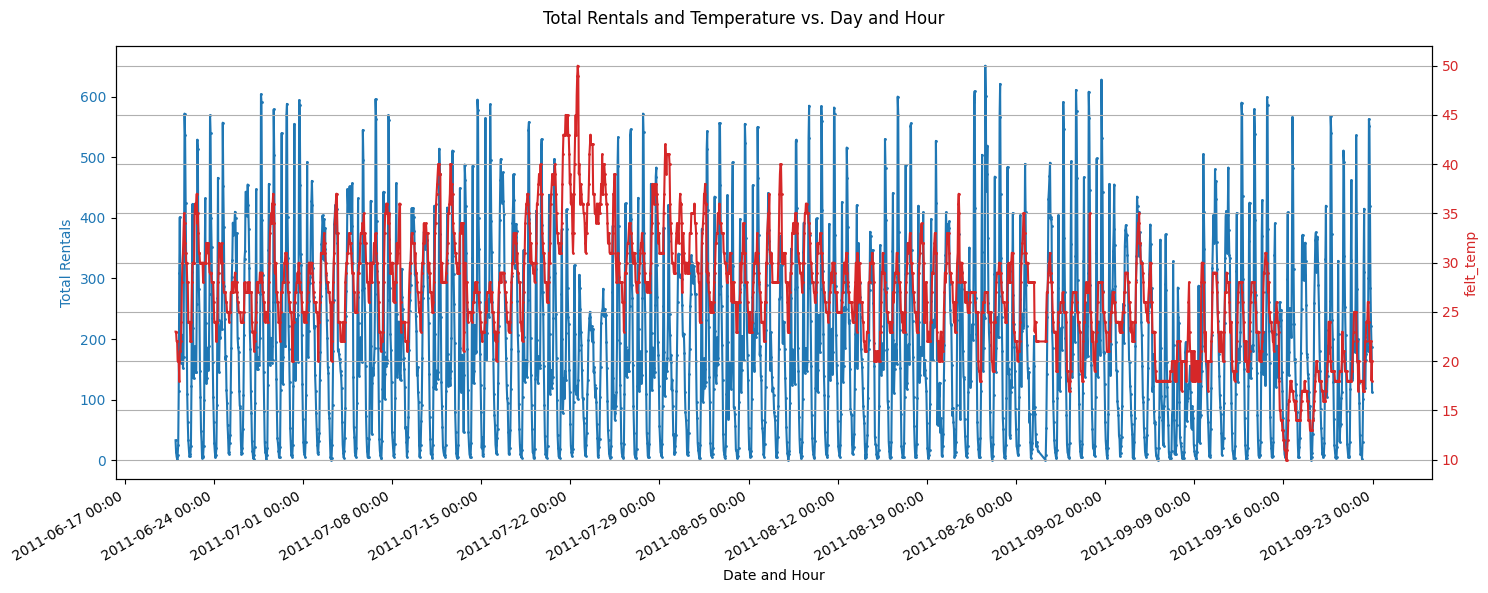

In [25]:
plot_rentals_vs_time(df_summer_2011, 'felt_temp')